Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 0.589 seconds.
Prefix dict has been built succesfully.


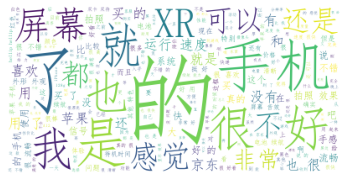

In [1]:
import snownlp
import pandas as pd
import wordcloud
import jieba
import matplotlib.pyplot as plt
from collections import Counter
# 读取文件
df = pd.read_excel('产品评价.xlsx')
data = df.values.tolist()
pos = 0
neg = 0
content = ''
res = []
# 拼接评论内容，同时统计好差评数量，对每个文本内容计算情感评分
for i in data:
    content += i[1]
    if i[2] == 1:
        pos += 1
    else:
        neg += 1
    res.append(snownlp.SnowNLP(i[1]).sentiments)
# jieba分词，再用空格连接
content = jieba.lcut(content)
contents = ' '.join(content)
content = Counter(content)
wc = wordcloud.WordCloud(
    font_path = 'C:/Windows/Fonts/simfang.ttf',
    background_color='white',
    max_words = 500,
    max_font_size = 120
)
# 生成词云图
wc.generate(contents)
plt.rcParams['font.sans-serif']=['SimHei']
plt.imshow(wc)
plt.axis('off')
plt.show()

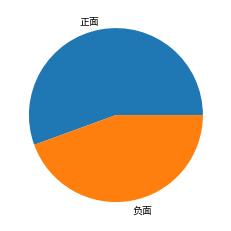

In [2]:
# 绘制好差评饼图
plt.clf()
plt.pie(x=[pos,neg],labels=['正面','负面'])
plt.show()

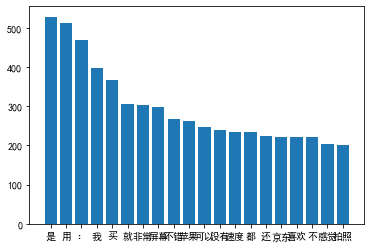

In [3]:
# 绘制词频图
xy = [[i,j] for i,j in content.items()]
xy.sort(key=lambda x:x[1],reverse=True)
x = [i[0] for i in xy[10:30]]
y = [i[1] for i in xy[10:30]]
plt.clf()
plt.bar(x,y)
plt.show()

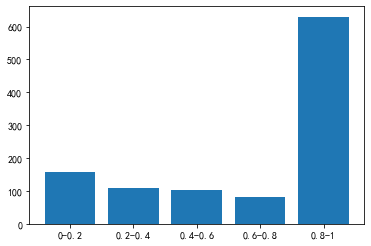

In [4]:
# 绘制情感得分图
score = [0,0,0,0,0]
for i in res:
    score[(int(i*100)-1)//20] += 1
x = ['0-0.2','0.2-0.4','0.4-0.6','0.6-0.8','0.8-1']
plt.clf()
plt.bar(x,score)
plt.show()